<a href="https://colab.research.google.com/github/Merina62/AI-and-ML/blob/main/MerinaShrestha_Worksheet_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Merina Shrestha

Student no: np03cs4a220406

**Implement an End to End CNN Model for Image Classification Task.**

Task 1: Data Understanding and Visualization:

1. Load and visualize images from a dataset stored in directories, where each subdirec-
tory represents a class.

Visualizing TRAIN samples


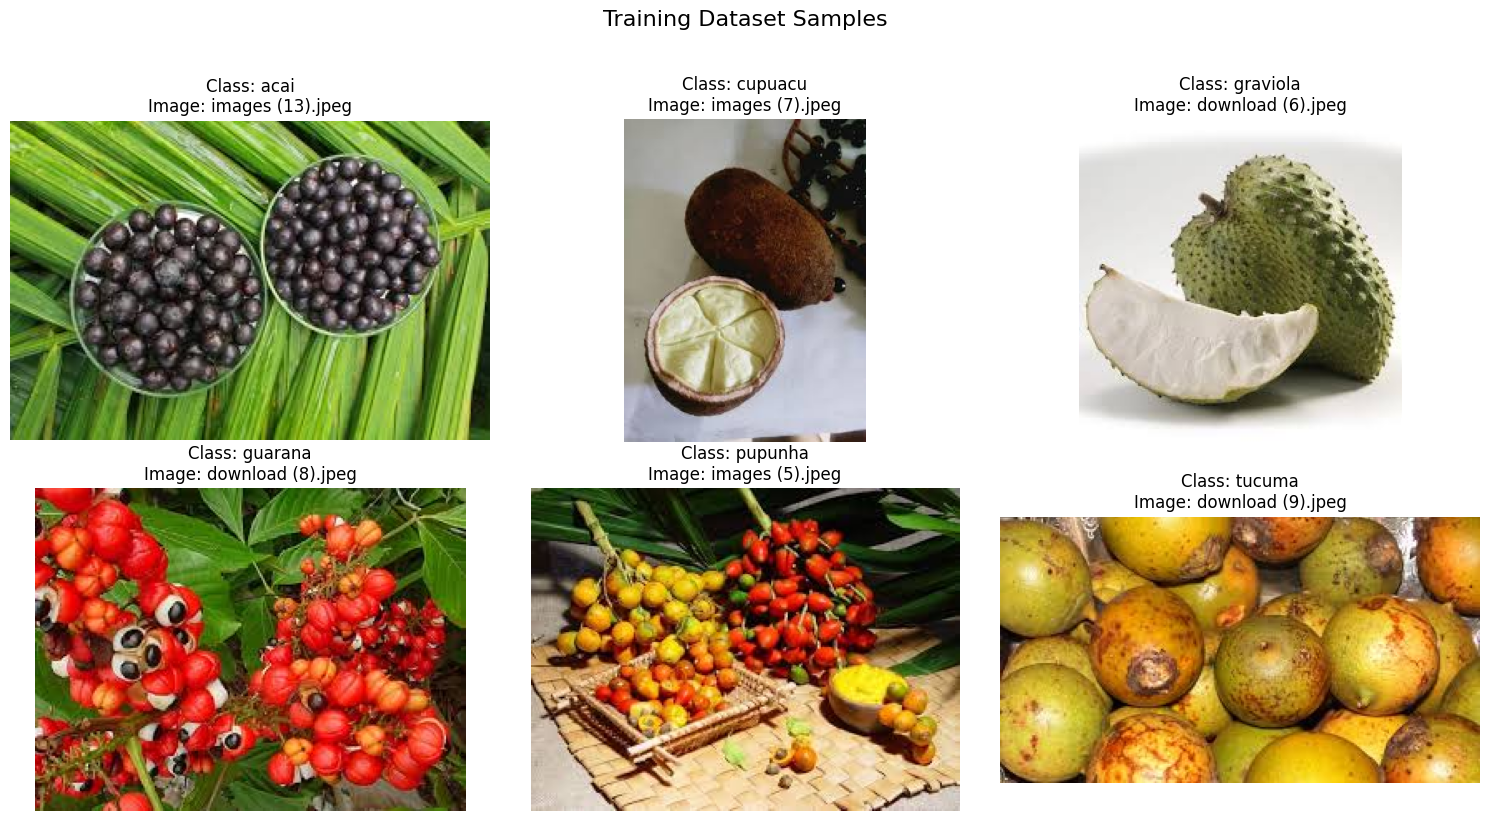

In [3]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

def visualize_random_samples(train_path, test_path=None, rows=2):

    # Function to process a single directory
    def process_directory(dataset_path, title_prefix=""):
        class_dirs = sorted([d for d in os.listdir(dataset_path)
                           if os.path.isdir(os.path.join(dataset_path, d))])

        num_classes = len(class_dirs)
        cols = (num_classes + 1) // rows

        plt.figure(figsize=(15, 8))
        plt.suptitle(f"{title_prefix} Dataset Samples", y=1.02, fontsize=16)

        for i, class_dir in enumerate(class_dirs):
            class_path = os.path.join(dataset_path, class_dir)
            images = [f for f in os.listdir(class_path)
                     if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

            if not images:
                print(f"No images found in class: {class_dir}")
                continue

            random_image = random.choice(images)
            img_path = os.path.join(class_path, random_image)

            img = Image.open(img_path)

            ax = plt.subplot(rows, cols, i+1)
            ax.imshow(img)
            ax.set_title(f"Class: {class_dir}\nImage: {random_image}")
            ax.axis('off')

        plt.tight_layout()
        plt.show()

    print("Visualizing TRAIN samples")
    process_directory(train_path, "Training")

train_path = "/content/drive/MyDrive/AI- 6CS012/Week-6/FruitinAmazon/train"
test_path = "/content/drive/MyDrive/AI- 6CS012/Week-6/FruitinAmazon/test"

visualize_random_samples(train_path)

In [4]:
import os
from PIL import Image
from PIL import UnidentifiedImageError

def check_and_remove_corrupted_images(dataset_path):
    """Check for and remove corrupted images in a directory tree.

    Args:
        dataset_path: Path to the root directory containing images

    Returns:
        List of paths to corrupted images that were removed
    """
    corrupted_images = []

    for root, _, files in os.walk(dataset_path):
        for filename in files:
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                file_path = os.path.join(root, filename)
                try:
                    # Verify image integrity
                    with Image.open(file_path) as img:
                        img.verify()  # Verify without loading entire image
                        img.close()   # Explicit close (redundant with 'with' but safe)

                except (IOError, SyntaxError, UnidentifiedImageError) as e:
                    # Handle corrupted image
                    corrupted_images.append(file_path)
                    os.remove(file_path)
                    print(f"Removed corrupted image: {file_path} (Error: {str(e)})")

    # Final report
    if not corrupted_images:
        print("No corrupted images found.")
    else:
        print(f"\nSummary: Removed {len(corrupted_images)} corrupted images.")

    return corrupted_images


train_path = "/content/drive/MyDrive/AI/FruitinAmazon/train"
check_and_remove_corrupted_images(train_path)

No corrupted images found.


[]

Task 2: Loading and Preprocessing Image Data in keras:

In [5]:
import tensorflow as tf

# Define image size and batch size
img_height = 128  # Example image height
img_width = 128   # Example image width
batch_size = 32
validation_split = 0.2  # 80% training, 20% validation
train_dir = "/content/drive/MyDrive/AI- 6CS012/Week-5/FruitinAmazon/train"

# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1. / 255)  # Normalize pixel values to [0, 1]

# Create training dataset with normalization
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=123
)

# Apply the normalization (Rescaling) to the dataset
train_ds = train_ds.map(lambda x, y: (rescale(x), y))


# Create validation dataset with normalization
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset='validation',
    seed=123
)

# Apply the normalization (Rescaling) to the validation dataset
val_ds = val_ds.map(lambda x, y: (rescale(x), y))


Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


Task 3 - Implement a CNN with

In [6]:
from tensorflow.keras import layers, models

def build_cnn_model(input_shape=(128, 128, 3), num_classes=10):
    """
    Builds a CNN model with the specified architecture:

    Convolutional Architecture:
    - Conv Layer 1: 32 filters (3x3), same padding, stride 1, ReLU
    - MaxPool 1: (2x2), stride 2
    - Conv Layer 2: 32 filters (3x3), same padding, stride 1, ReLU
    - MaxPool 2: (2x2), stride 2

    Fully Connected Architecture:
    - Flatten layer
    - Dense layer: 128 neurons, ReLU
    - Dense layer: 64 neurons, ReLU
    - Output layer: num_classes neurons, softmax
    """
    model = models.Sequential()

    # Convolutional Architecture
    # Block 1
    model.add(layers.Conv2D(32, (3, 3),
                            strides=(1, 1),
                            padding='same',
                            activation='relu',
                            input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2), strides=2))

    # Block 2
    model.add(layers.Conv2D(32, (3, 3),
                            strides=(1, 1),
                            padding='same',
                            activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=2))

    # Fully Connected Network Architecture
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Create the model instance
cnn_model = build_cnn_model()

# Print the model summary
cnn_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,097,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,116,970 (8.08 MB)

 Trainable params: 2,116,970 (8.08 MB)

 Non-trainable params: 0 (0.00 B)

Task 4: Compile and Train the Model

In [7]:
from tensorflow.keras import optimizers, callbacks

# Compile the model
cnn_model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),  # Adam optimizer with default learning rate
    loss="sparse_categorical_crossentropy",  # Suitable for integer labels
    metrics=["accuracy"]  # Track accuracy
)

# Define callbacks
checkpoint_cb = callbacks.ModelCheckpoint("best_model.h5", save_best_only=True, monitor="val_accuracy")
early_stopping_cb = callbacks.EarlyStopping(patience=10, restore_best_weights=True, monitor="val_loss")

# Train the model
history = cnn_model.fit(
    train_ds,
    validation_data=val_ds,
    batch_size=16,  # Set batch size
    epochs=250,  # Number of epochs
    callbacks=[checkpoint_cb, early_stopping_cb],  # Save best model & avoid overfitting
)


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.1250 - loss: 2.3158 

3/3 ━━━━━━━━━━━━━━━━━━━━ 28s 7s/step - accuracy: 0.1250 - loss: 2.3133 - val_accuracy: 0.0000e+00 - val_loss: 2.2720
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 539ms/step - accuracy: 0.1794 - loss: 1.9259

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 752ms/step - accuracy: 0.1832 - loss: 1.9108 - val_accuracy: 0.7222 - val_loss: 1.5753
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 745ms/step - accuracy: 0.3407 - loss: 1.6546 - val_accuracy: 0.2778 - val_loss: 1.5804
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 452ms/step - accuracy: 0.4826 - loss: 1.3485 - val_accuracy: 0.7222 - val_loss: 1.1272
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 498ms/step - accuracy: 0.7431 - loss: 0.9540 - val_accuracy: 0.6111 - val_loss: 1.0240
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 428ms/step - accuracy: 0.7391 - loss: 0.8403 - val_accuracy: 0.6111 - val_loss: 1.1459
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - accuracy: 0.8310 - loss: 0.6321

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 598ms/step - accuracy: 0.8247 - loss: 0.6362 - val_accuracy: 0.7778 - val_loss: 0.8089
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 741ms/step - accuracy: 0.8967 - loss: 0.4860 - val_accuracy: 0.7778 - val_loss: 0.6884
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step - accuracy: 0.9659 - loss: 0.2771

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 503ms/step - accuracy: 0.9605 - loss: 0.2844 - val_accuracy: 0.8889 - val_loss: 0.5237
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 438ms/step - accuracy: 1.0000 - loss: 0.1662 - val_accuracy: 0.8889 - val_loss: 0.4481
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 451ms/step - accuracy: 0.9674 - loss: 0.1722 - val_accuracy: 0.8889 - val_loss: 0.3891
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 505ms/step - accuracy: 1.0000 - loss: 0.0668 - val_accuracy: 0.8889 - val_loss: 0.6245
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 507ms/step - accuracy: 0.9813 - loss: 0.0775 - val_accuracy: 0.7778 - val_loss: 0.3801
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step - accuracy: 0.9797 - loss: 0.0392

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 695ms/step - accuracy: 0.9813 - loss: 0.0391 - val_accuracy: 0.9444 - val_loss: 0.2326
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 746ms/step - accuracy: 1.0000 - loss: 0.0183 - val_accuracy: 0.9444 - val_loss: 0.3460
Epoch 16/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 450ms/step - accuracy: 1.0000 - loss: 0.0179 - val_accuracy: 0.8889 - val_loss: 0.4403
Epoch 17/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 514ms/step - accuracy: 1.0000 - loss: 0.0133 - val_accuracy: 0.8889 - val_loss: 0.4120
Epoch 18/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 426ms/step - accuracy: 1.0000 - loss: 0.0068 - val_accuracy: 0.8333 - val_loss: 0.3298
Epoch 19/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 583ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 0.8889 - val_loss: 0.2931
Epoch 20/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 779ms/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 0.8889 - val_loss: 0.2999
Epoch 21/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 450ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.8889 - val_lo

Task 5: Evaluate the Model

In [8]:
# Load the best saved model
from tensorflow.keras.models import load_model

best_model = load_model("best_model.h5")

# Evaluate the model on the test dataset
test_loss, test_accuracy = best_model.evaluate(train_ds)

print(f"Training Loss: {test_loss:.4f}")
print(f"Training Accuracy: {test_accuracy:.4f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 1.0000 - loss: 0.0186
Training Loss: 0.0176
Training Accuracy: 1.0000


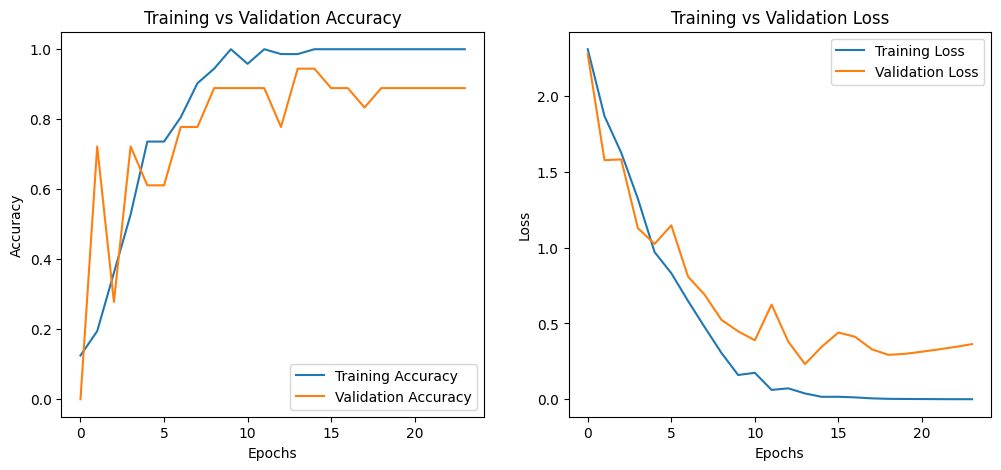

In [9]:
import matplotlib.pyplot as plt

# Extract loss and accuracy from history
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

epochs_range = range(len(train_loss))

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()

plt.show()


Task 6: Save and Load the Model

In [10]:
from tensorflow.keras.models import load_model

# Load the model from file
loaded_model = load_model('best_model.h5')

# Verify the loaded model
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,097,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,116,972 (8.08 MB)

 Trainable params: 2,116,970 (8.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Task 7: Predictions and Classification Report

In [11]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/AI- 6CS012/Week-5/FruitinAmazon/test',
    image_size=(128, 128),
    batch_size= 32
)

rescale = tf.keras.layers.Rescaling(1./255)
test_ds = test_ds.map(lambda x, y: (rescale(x), y))

Found 30 files belonging to 6 classes.


In [12]:
train_path = "/content/drive/MyDrive/AI- 6CS012/Week-5/FruitinAmazon/train"
class_names = sorted([d for d in os.listdir(train_path)
                    if os.path.isdir(os.path.join(train_path, d))])
print("Class names:", class_names)

Class names: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


In [13]:
import numpy as np
from sklearn.metrics import classification_report


# Make predictions on the test dataset
y_pred_probs = best_model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Get the true labels from the test dataset
y_true = np.concatenate([y for x, y in test_ds], axis=0)

report = classification_report(y_true, y_pred, target_names=class_names)

print("Classification Report:")
print(report)

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
Classification Report:
              precision    recall  f1-score   support

        acai       0.14      0.20      0.17         5
     cupuacu       0.14      0.20      0.17         5
    graviola       0.00      0.00      0.00         5
     guarana       0.00      0.00      0.00         5
     pupunha       0.20      0.20      0.20         5
      tucuma       0.33      0.20      0.25         5

    accuracy                           0.13        30
   macro avg       0.14      0.13      0.13        30
weighted avg       0.14      0.13      0.13        30



# 3 Task - 1:

Use Data Augmentation to increase the number of training image.

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/AI- 6CS012/Week-6/FruitinAmazon/train',
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/AI- 6CS012/Week-6/FruitinAmazon/train',
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 72 images belonging to 6 classes.
Found 18 images belonging to 6 classes.


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

num_classes = train_generator.num_classes

model = Sequential()

# Block 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Block 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Block 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Fully Connected
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


In [25]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20
)


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.1094 - loss: 3.3198 - val_accuracy: 0.2778 - val_loss: 1.7852
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.2009 - loss: 2.7419 - val_accuracy: 0.3333 - val_loss: 1.7831
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.1437 - loss: 2.6337 - val_accuracy: 0.1667 - val_loss: 1.7914
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.3533 - loss: 2.6968 - val_accuracy: 0.1667 - val_loss: 1.7907
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.1931 - loss: 2.7721 - val_accuracy: 0.1667 - val_loss: 1.7911
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.3806 - loss: 1.7705 - val_accuracy: 0.1667 - val_loss: 1.8145
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.3826 - loss: 2.4032 - val_accuracy: 0.1667 - val_loss: 1.8472
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.2222 - loss: 2.1799 - val_accuracy: 0.1667 - val_loss: 1.8832
Epoch 9/20
3/3 

In [26]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 98, 98, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 96, 96, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 96, 96, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 46, 46, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 46, 46, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 44, 44, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 44, 44, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 20, 20, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,258,676 (39.13 MB)

 Trainable params: 3,419,174 (13.04 MB)

 Non-trainable params: 1,152 (4.50 KB)

 Optimizer params: 6,838,350 (26.09 MB)

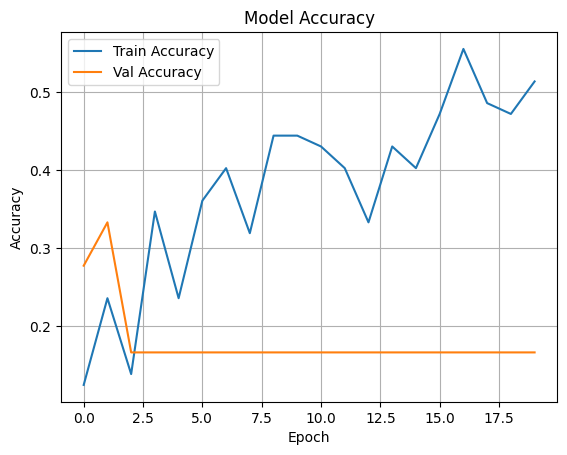

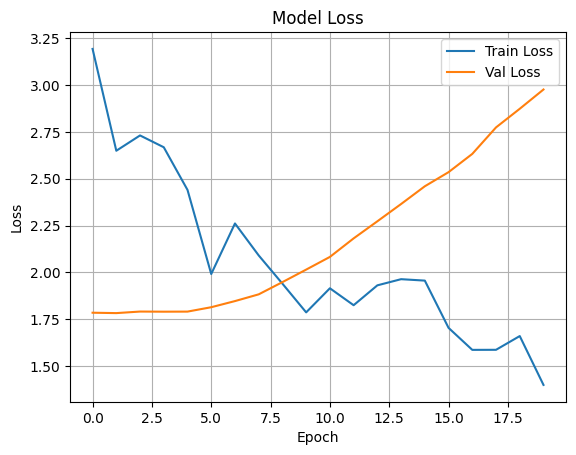

In [27]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [28]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/AI- 6CS012/Week-6/FruitinAmazon/test',
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")


Found 30 images belonging to 6 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 804ms/step - accuracy: 0.1667 - loss: 2.9657
Test Accuracy: 0.17


# 5 Task - 2:

To - Do:
• Implement transfer learning using a pre-trained model trained on ImageNet weights, freeze the
layers of the model, and fit it only on the output layer to classify the fruits dataset.
• Evaluate the model’s performance and generate an inference output and classification report.
• Did the performance improved compared to training from scratch.

In [29]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt


In [30]:
IMAGE_SIZE = (100, 100)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/AI- 6CS012/Week-6/FruitinAmazon/train',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/AI- 6CS012/Week-6/FruitinAmazon/train',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

num_classes = len(train_generator.class_indices)


Found 72 images belonging to 6 classes.
Found 18 images belonging to 6 classes.


In [31]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(100, 100, 3))
base_model.trainable = False  # Freeze the base layers

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


<ipython-input-31-85f44f353b26>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(100, 100, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_66"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 50, 50,    │        864 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 50, 50,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 50, 50,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 50, 50,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 50, 50,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 50, 50,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 50, 50,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 50, 50,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 50, 50,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 50, 50,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 50, 50,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 51, 51,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 25, 25,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 25, 25,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 25, 25,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 25, 25,    │      2,304 │ block_1_depthwis

 Total params: 2,422,726 (9.24 MB)

 Trainable params: 164,742 (643.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [32]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.2, min_lr=1e-6)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[early_stop, reduce_lr]
)


Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.1918 - loss: 3.0997 - val_accuracy: 0.4444 - val_loss: 1.6477 - learning_rate: 0.0010
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 357ms/step - accuracy: 0.5007 - loss: 1.4686 - val_accuracy: 0.3889 - val_loss: 1.1497 - learning_rate: 0.0010
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 484ms/step - accuracy: 0.6215 - loss: 1.1557 - val_accuracy: 0.6111 - val_loss: 1.0144 - learning_rate: 0.0010
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 382ms/step - accuracy: 0.7882 - loss: 0.5866 - val_accuracy: 0.5556 - val_loss: 1.1394 - learning_rate: 0.0010
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 315ms/step - accuracy: 0.8394 - loss: 0.4782 - val_accuracy: 0.6111 - val_loss: 1.1037 - learning_rate: 0.0010
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 507ms/step - accuracy: 0.8399 - loss: 0.4094 - val_accuracy: 0.7222 - val_loss: 0.8411 - learning_rate: 0.0010
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 660ms/step - accuracy: 0.8389 - loss: 0.2982 - val_accuracy: 0.

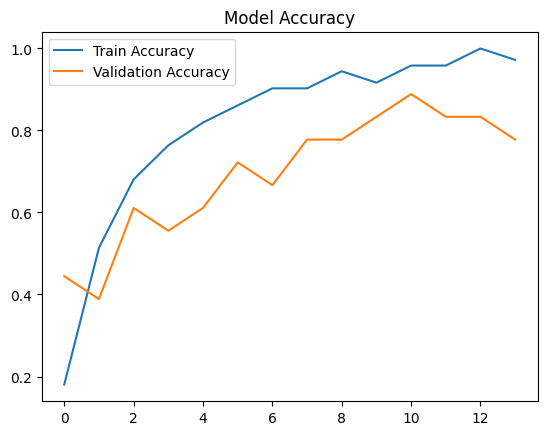

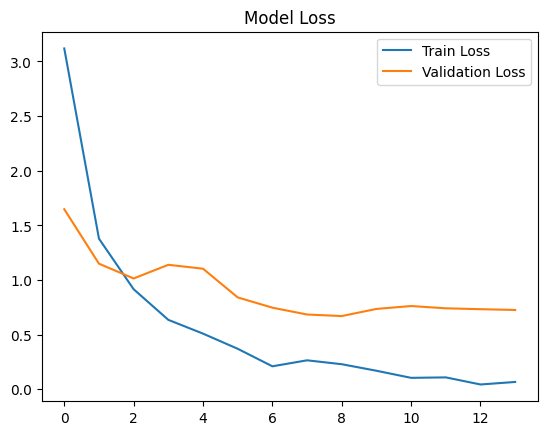

In [33]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.legend()
plt.show()


In [34]:
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)

print("Classification Report:")
print(classification_report(val_generator.classes, y_pred, target_names=val_generator.class_indices.keys()))

print("Confusion Matrix:")
print(confusion_matrix(val_generator.classes, y_pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Classification Report:
              precision    recall  f1-score   support

        acai       1.00      1.00      1.00         3
     cupuacu       1.00      1.00      1.00         3
    graviola       1.00      1.00      1.00         3
     guarana       1.00      1.00      1.00         3
     pupunha       0.33      0.33      0.33         3
      tucuma       0.33      0.33      0.33         3

    accuracy                           0.78        18
   macro avg       0.78      0.78      0.78        18
weighted avg       0.78      0.78      0.78        18

Confusion Matrix:
[[3 0 0 0 0 0]
 [0 3 0 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 3 0 0]
 [0 0 0 0 1 2]
 [0 0 0 0 2 1]]
